# Laboratorio 6

Indicaciones generales:

* En lo que respecta a `C` no deberá usar punteros, ni arreglos. Tampoco se deberá emplear administración de memoria dinámica, ni de funciones auxiliares de ninguna librería.

* Los puntajes de ítems relacionados con mediciones de tiempo, error relativo y presentación de gráficos solo serán asignados en caso sus funciones estén correctamente implementadas.

* Las funciones implementadas solo deberán tener los argumentos mencionados en sus respectivos ítems.

* Los resultados de la función `_slow_` serán las referencias para medir los speedups.

* No se puede emplear ChatGPT, ni ningún modelo de lenguaje.

* Puede emplear apuntes, clases y hacer consultas en foros de internet.

In [1]:
# no borrar esta celda
! rm *.c *.o *.so

## Ejercicio

El coseno de un ángulo `x` se calcula con la siguiente serie:

$$
cos(x) = 1 - \frac{x^{2}}{2!} + \frac{x^{4}}{4!} - \frac{x^{6}}{6!} + \frac{x^{8}}{8!} - \cdots
$$

Durante el laboratorio se le solicitará implementar una grupo de funciones basados en esta serie.

1. Implementar una función en `python` que calcule el coseno de un ángulo `x`.

Nombre: `py_slow_cos`

Argumentos:
* `x` : ángulo
* `n_terms`: cantidad de términos

Resultado: `cos(x)`

Observaciones: 

* No debe emplear funciones de módulos auxiliaries, ni suyas propias. 
* Todo se debe hacer dentro de la función.

In [9]:
def py_slow_cos(x,n_terms):
    suma = 0
    for i in range(n_terms):
        n=2*i
        if(i==0):
            fact=1
        else:
            fact=1
            for j in range(1,n+1):
                fact=fact*j
        term=(x**(2*i))/fact
        suma=suma+(term*((-1)**i))
    return suma

In [10]:
import math
print(py_slow_cos(math.pi,10))

-1.0000000035290801


2. Implementar una función en `python` que calcule el coseno de un ángulo `x`.

Nombre: `py_fast_cos`

Argumentos:
* `x` : ángulo
* `n_terms`: cantidad de términos

Resultado: `cos(x)`

Observaciones: 
* No puede emplear factorial de ninguna manera. 
* No debe emplear funciones de módulos auxiliares, ni suyas propias.
* Debe ser iterativo.
* Sugerencia: Deducir el término $t_{n}$ en función del término $t_{n-1}$

In [11]:
def py_fast_cos(x,n_terms):
    term=1
    suma=0
    for i in range(n_terms):
        if(i==0):
            suma=1
        else:
            n=2*i
            term=(-1*term*x*x)*(1.0/(n*(n-1)))
            suma=suma+term
    return suma

In [12]:
import math
print(py_fast_cos(math.pi,10))

-1.0000000035290808


3. En una celda mágica implementar dos versiones en `C` para la función `py_fast_cos`. Una versión trabajará con tipo `double` y otra trabajará con tipo `long double`. Considere que estas funciones tienen los mismos argumentos que la función `py_fast_cos`.

Observaciones:

* Justifique el tipo de dato de cada uno de los argumentos.
* Justifique el tipo de dato que devuelve la función.

In [13]:
%%file C_cosx.c
#include <stdio.h>
#include <stdint.h>
#usaos double como argumento porque los datos pueden ser decimales o numeros irracionales como pi
#usamos uint_64 para que no halla problemas al usar ctypes (problemas de compatibilidad)
double cos_x_fast_1 (double x,uint64_t n_terms ){
    double term=1;
    double suma=0.0;
    for (int i=0; i<n_terms; i++){
        if(i==0){
            suma=1;
        }else{
            int n=2*i;
            term=(-1*term*x*x)*(1.0/(n*(n-1.0)));
            suma=suma+term;
        }
    }
    return suma;
}
#lo mismo q el anterior pero los usamos para mayor precision
long double cos_x_fast_2 (long double x,uint64_t n_terms ){
    long double term=1;
    long double suma=0.0;
    uint64_t n;
    for (int i=0; i<n_terms; i++){
        if(i==0){
            suma=1;
        }else{
            uint64_t n=2*i;
            term=(-1*term*x*x)*(1.0/(long double)(n*(n-1)));
            suma=suma+term;
        }
    }
    return suma;
}

Overwriting C_cosx.c


4. Crear el *object file* y la *shared library*

In [14]:
! gcc -c C_cosx.c -o C_cosx.o

In [15]:
! gcc -shared C_cosx.o -o C_cosx.so  

5. Hacer una función que enlace con `Python` mediante `ctypes` las funciones anteriores. Esta función debe devolver las dos funciones configuradas.

In [16]:
import ctypes
def Ctypes_funcs():
    libfile = './C_cosx.so'
    lib= ctypes.CDLL(libfile)
    lib.cos_x_fast_1.argtypes = [ctypes.c_double, ctypes.c_uint64]
    lib.cos_x_fast_1.restype = ctypes.c_double
    lib.cos_x_fast_2.argtypes = [ctypes.c_longdouble, ctypes.c_uint64]
    lib.cos_x_fast_2.restype = ctypes.c_longdouble
    return lib.cos_x_fast_1, lib.cos_x_fast_2

6. Haga una instancia de las dos funciones

In [17]:
cos_x_fast_1, cos_x_fast_2 = Ctypes_funcs()


In [18]:
import math
print((cos_x_fast_1(math.pi,10000)))
print((cos_x_fast_2(math.pi,10000)))

-1.0000000000000009
-1.0


7. Implemente una función que de forma iterativa encuentre la cantidad de términos que requieren sus funciones para calcular con una determinada precisión el seno de un grupo de ángulos definidos entre $[inf, sup]$.

Nombre de la función: `encontrar_n_terms`

Argumentos:

* `f`: función

* `inf`: extremo izquierdo del dominio

* `sup`: extremo derecho del dominio

* `n_angs`: cantidad de ángulos

* `pre`: precisión

Resultado: Cantidad de términos

Observaciones: 
* Puede usar la función `linspace` del módulo `numpy` para crear su vector de ángulos, y la función `norm` del submódulo `linalg` del módulo `numpy` para calcular la norma de un arreglo. 
* Para su referencia considere el resultado de la función `cos` del módulo `numpy`.



In [19]:
import numpy as np

def encontrar_n_terms(f,inf,sup,n_angs,pre):
    angulo= np.linspace(inf, sup, num=n_angs)
    referencia= np.cos(angulo)
    n_terms=1
    lista_res=[]
    while(True):
        
        for i in range(len(referencia)):
            lista_res.append(f(angulo[i],n_terms))

        error= np.linalg.norm(lista_res-referencia)/np.linalg.norm(referencia)
        if(error<pre):
            break
        n_terms = n_terms+1
        lista_res=[]

    return n_terms

8. Haga una prueba de `encontrar_n_terms` para cada una de sus funciones. 

Considere:
* `inf` = -2pi
* `sup` = 2pi
* `n_angs` = 1000
* `pre` = 4e-15

Observación: Cada resultado debe estar asignado a una variable independiente y ser mostrado en una celda

In [20]:
import math
inf= -2*math.pi
sup= 2*math.pi
n_angs= 1000
pre= 4e-15
print(encontrar_n_terms(py_fast_cos,inf, sup, n_angs, pre))

19


In [21]:
print(encontrar_n_terms(py_slow_cos,inf, sup, n_angs, pre))

19


In [22]:
print(encontrar_n_terms(cos_x_fast_1,inf, sup, n_angs, pre))

19


In [23]:
print(encontrar_n_terms(cos_x_fast_2,inf, sup, n_angs, pre))

19


9. Implemente una función que realice una cantidad de mediciones de tiempo de alguna de sus funciones que calcula el coseno y devuelva la mediana de esas mediciones.

Nombre de la función: `encontrar_mediana_de_mediciones_cos`
Argumentos:
* `f`: función
* `ang`: ángulo de la función
* `n_terms`: cantidad de términos de la función
* `n_iter`: cantidad de iteraciones

Resultado: Mediana de las mediciones realizadas.

Observación: Puede emplear la función `median` del módulo `statistics`.

In [24]:
import time
import statistics
def encontrar_mediana_de_mediciones_cos(f, ang, n_terms, n_iter):
    lista=[]
    for i in range(n_iter):
        tic = time.perf_counter()
        f(ang,n_terms)
        toc = time.perf_counter()
        tiempo=toc-tic
        lista.append(tiempo)
    mediana= statistics.median(lista)
    return mediana

10. Haga dos pruebas de `encontrar_mediana_de_mediciones_cos` para cada una de sus funciones. 

Prueba 1 :
* `ang` = `inf`
* `n_iter` = 50

Prueba 2 :
* `ang` = `sup`
* `n_iter` = 50

Observaciones:

* Cada función empleará su cantidad de términos previamente calculados
* Cada resultado deberá ser asignado a una variable independiente

In [25]:
#slow
slow_1=encontrar_mediana_de_mediciones_cos(py_slow_cos, -2*math.pi, 19, 50)*10**3
slow_2=encontrar_mediana_de_mediciones_cos(py_slow_cos, 2*math.pi, 19, 50)*10**3
#fast
fast_1=encontrar_mediana_de_mediciones_cos(py_fast_cos, -2*math.pi, 19, 50)*10**3
fast_2=encontrar_mediana_de_mediciones_cos(py_fast_cos, 2*math.pi, 19, 50)*10**3

#cos_1_double
cos_1_1=encontrar_mediana_de_mediciones_cos(cos_x_fast_1, -2*math.pi, 19, 50)*10**3
cos_1_2=encontrar_mediana_de_mediciones_cos(cos_x_fast_1, 2*math.pi, 19, 50)*10**3

#c_2_double_long
cos_2_1=encontrar_mediana_de_mediciones_cos(cos_x_fast_2, -2*math.pi, 19, 50)*10**3
cos_2_2=encontrar_mediana_de_mediciones_cos(cos_x_fast_2, 2*math.pi, 19, 50)*10**3


print(slow_1)
print(slow_2)
print(fast_1)
print(fast_2)
print(cos_1_1)
print(cos_1_2)
print(cos_2_1)
print(cos_2_2)

0.016255500668194145
0.016019001122913323
0.00498200097354129
0.005115998646942899
0.0005625024641631171
0.00044199987314641476
0.0004659996193367988
0.00046300010581035167


11. Presente gráficos de barras de las medianas de los tiempos y de los speedups a partir de sus resultados del ítem anterior

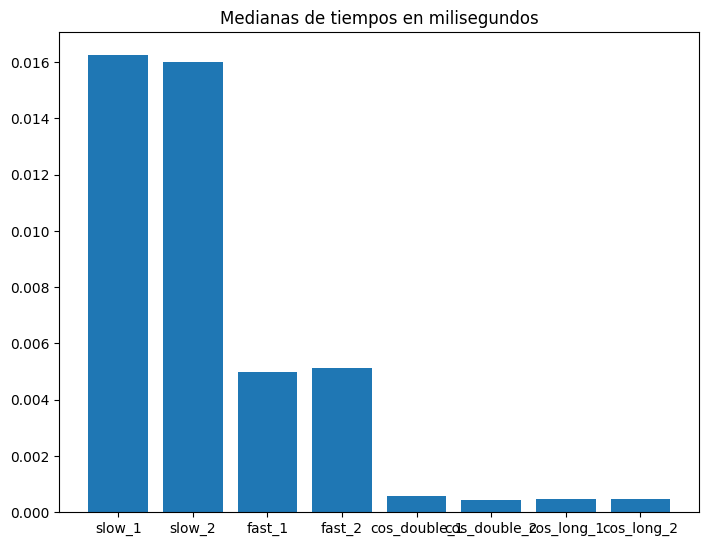

In [26]:
import matplotlib.pyplot as plt
import statistics
medianas= slow_1, slow_2, fast_1, fast_2 , cos_1_1, cos_1_2, cos_2_1 , cos_2_2
fig = plt.figure()
ax = fig.add_axes ([0,0,1,1])
casos = ['slow_1', 'slow_2', 'fast_1', 'fast_2', 'cos_double_1', 'cos_double_2', 'cos_long_1', 'cos_long_2']
ax.bar(casos,medianas)
plt.title("Medianas de tiempos en milisegundos")
plt.show()

12. Implemente una función en `Python` que calcule el seno de un arreglo de ángulos.

Nombre de la función: `calc_cosens`

Argumentos:
* `f`: función
* `inf`: extremo izquierdo del dominio
* `sup`: extremo derecho del dominio
* `n_angs`: cantidad de ángulos
* `n_terms`: cantidad de términos de la función `f`

Resultado: Arreglo de `numpy` con los senos de los ángulos

Observación: Puede emplear la función `linspace` del módulo `numpy` para crear su arreglo de ángulos.

In [27]:
import numpy as np
import math
def calc_cosens(f,inf, sup, n_angs, n_terms):
    arreglo=np.linspace(inf,sup, num=n_angs)
    lista=[]
    for i in range(len(arreglo)):
        lista.append(f(arreglo[i], n_terms))
    return lista

13. Implemente una función que realice una cantidad de mediciones de tiempo de su función anterior y devuelva la mediana de esas mediciones.

Nombre de la función: `encontrar_mediana_de_mediciones_calc_cosens`

Argumentos:
* `f`: función
* `inf`: extremo izquierdo del dominio
* `sup`: extremo derecho del dominio
* `n_terms`: cantidad de términos de la función
* `n_iter`: cantidad de iteraciones

Resultado: Mediana de las mediciones realizadas.

Observación: Puede emplear la función `median` del módulo `statistics`.

In [28]:
import time
import statistics
def encontrar_mediana_de_mediciones_calc_cosens(f,inf, sup,n_angs ,n_terms, n_iter ):
    lista=[]
    for j in range(n_iter):
        tic=time.perf_counter()
        calc_cosens(f,inf, sup, n_angs, n_terms)
        toc=time.perf_counter()
        lista.append(toc-tic)
    return statistics.median(lista)

14. Haga pruebas de `encontrar_mediana_de_mediciones_cosens` para cada una de sus funciones. 

Observaciones:

* Los valores para `inf`, `sup`, `n_angs` y `n_iter` serán los mismos que los definidos anteriormente
* Cada función empleará su cantidad de términos previamente calculados
* Cada resultado deberá ser asignado a una variable independiente

In [29]:
n_slow = encontrar_mediana_de_mediciones_calc_cosens(py_slow_cos,inf, sup,n_angs ,19, 50 )*10**3
n_fast = encontrar_mediana_de_mediciones_calc_cosens(py_fast_cos,inf, sup,n_angs ,19, 50 )*10**3
fast_1 = encontrar_mediana_de_mediciones_calc_cosens(cos_x_fast_1,inf, sup,n_angs ,19, 50 )*10**3
fast_2 = encontrar_mediana_de_mediciones_calc_cosens(cos_x_fast_2,inf, sup,n_angs ,19, 50 )*10**3
lista_new =[n_slow, n_fast , fast_1 , fast_2]
print([n_slow, n_fast , fast_1 , fast_2])

[30.788542999289348, 4.831655000089086, 0.49988649880106095, 0.5204674998822156]


15. Presente gráficas de barras de las medianas calculadas en el item anterior y de los speedups a partir de los resultados del ítem anterior.

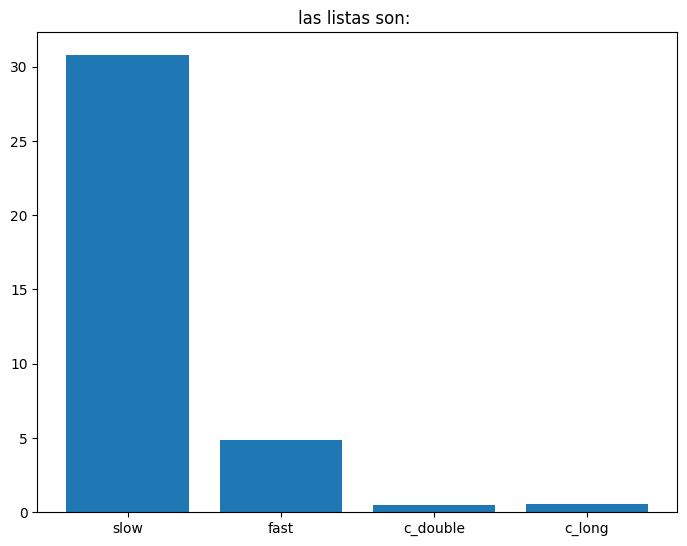

In [30]:
fig = plt.figure()
ax = fig.add_axes ([0,0,1,1])
casos = ['slow', 'fast', 'c_double', 'c_long']
ax.bar(casos,lista_new)
plt.title("las listas son: ")
plt.show()

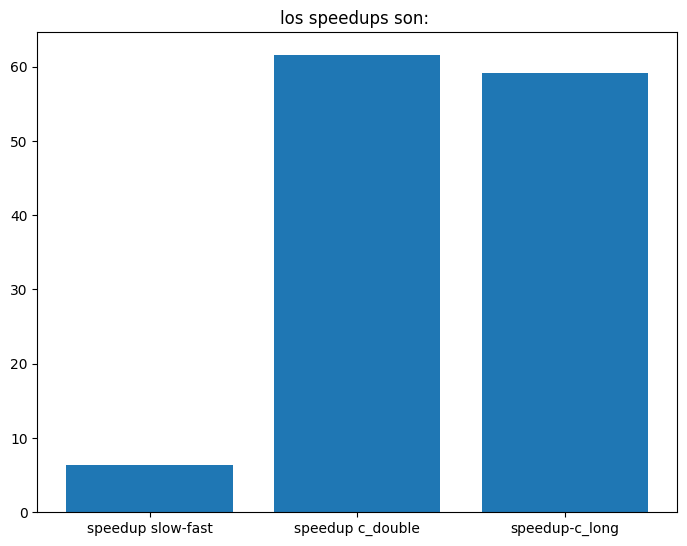

In [31]:
#GRAFICA SPEEDUPS
lista=[lista_new[0]/lista_new[1], lista_new[0]/lista_new[2],lista_new[0]/lista_new[3]]
fig = plt.figure()
ax = fig.add_axes ([0,0,1,1])
casos = ['speedup slow-fast', 'speedup c_double', 'speedup-c_long']
ax.bar(casos,lista)
plt.title("los speedups son: ")
plt.show()

## Distribución de puntaje

| ítem | puntos |
|:----:|:------:|
|   1  |    1   |
|   2  |    2   |
|   3  |    4   |
|   4  |   0.5  |
|   5  |   0.5  |
|   6  |   0.5  |
|   7  |   1.5  |
|   8  |   0.5  |
|   9  |   1.5  |
|  10  |   0.5  |
|  11  |   0.5  |
|  12  |   0.5  |
|  13  |   0.5  |
|  14  |   0.5  |
|  15  |   0.5  |